<div style="text-align:center">
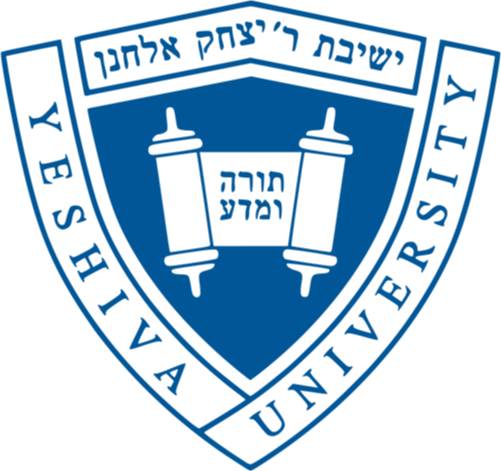
</div>

<h1 style='text-align: center;'>Katz School of Science and Health</h1>
<h1 style='text-align: center;'>AIM 5004 Predictive Models</h1>
<p>
<h2 style='text-align: center;'>Homework 08</h1>
<br><br>

<h3 style='text-align: center;'>Radek Jan Holik</h3>
<br>
<br>

# Package import

In [174]:
# Import some important packages here
import numpy as np
import pandas as pd
from statsmodels.formula.api import glm
import statsmodels.api as sm
from scipy.stats import chisquare
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

### __Exercise 15.4. *Show that the normal distribution can be written in exponential form as__

$$
p(y; \theta, \phi) = exp\Biggl\{ \frac{y \theta - \theta^2 / 2}{\phi} - \frac{1}{2}\Biggr[ \frac{y^2}{\phi} + \log_e (2 \pi \phi)  \Biggr]  \Biggl\}
$$

where $\theta = g_c (\mu) = \mu $; $\phi = \sigma^2 $; $ a(\phi) = \phi$; $b(\theta) = \theta^2/2$; and $c(y, \phi) = - \frac{1}{2} \bigr[ y^2 / \phi + \log_e (2 \pi \phi) \bigr]$.

#### __Solution:__

The probability density function (PDF) of the normal distribution:
$$
p(y;\mu,\sigma^2)= \frac{1}{\sqrt{2 \pi \sigma^2}} exp\Biggl\{- \frac{(y - \mu)^2}{2 \sigma^2} \Biggl\}​
$$

Substitution of  $\mu$ and $\sigma^2$ with $\theta$ and $\phi$, respectively:
$$
p(y;\theta,\phi)= \frac{1}{\sqrt{2 \pi \phi}} exp\Biggl\{- \frac{(y - \theta)^2}{2 \phi} \Biggl\}​
$$

The exponent term:
$$
- \frac{(y - \theta)^2}{2 \phi} = - \frac{y^2 - 2 y \theta + \theta^2}{2 \phi} = - \frac{y^2}{2\phi} + \frac{y \theta}{\phi} - \frac{\theta^2}{2 \phi}
$$

Substitution this back into the PDF:
$$
p(y;\theta,\phi)= \frac{1}{\sqrt{2 \pi \phi}} exp\Biggl\{- \frac{y^2}{2\phi} + \frac{y \theta}{\phi} - \frac{\theta^2}{2 \phi} \Biggl\}​
$$

The exponential term into three parts:
$$
p(y;\theta,\phi)= \frac{1}{\sqrt{2 \pi \phi}} \cdot exp\Biggl\{- \frac{y^2}{2\phi}\Biggl\} \cdot exp\Biggl\{\frac{y \theta}{\phi}\Biggl\} \cdot exp\Biggl\{-\frac{\theta^2}{2 \phi} \Biggl\}​
$$

This expression can be rewritten using the exponential form:
$$
p(y;\theta,\phi)= exp\Biggl\{ \log_e \frac{1}{\sqrt{2 \pi \phi}} + \log_e exp\biggl\{- \frac{y^2}{2\phi}\biggl\} + \log_e exp\biggl\{\frac{y \theta}{\phi}\biggl\} + \log_e exp\biggl\{-\frac{\theta^2}{2 \phi} \biggl\} \Biggl\}       ​
$$

This expression can be simplified:
$$
p(y;\theta,\phi)= exp\Biggl\{- \frac{1}{2} \log_e (2 \pi \phi) - \frac{y^2}{2\phi} + \frac{y \theta}{\phi} -\frac{\theta^2}{2 \phi} \Biggl\}       ​
$$

The terms inside the exponential function can be rearranged:
$$
p(y;\theta,\phi)= exp\Biggl\{\frac{y \theta}{\phi} -\frac{\theta^2}{2 \phi} - \frac{1}{2} \biggr[\frac{y^2}{\phi}  + \log_e (2 \pi \phi)  \biggr] \Biggl\}       ​
$$

Adjustment of the first two terms in the exponential:
$$
p(y; \theta, \phi) = exp\Biggl\{ \frac{y \theta - \theta^2 / 2}{\phi} - \frac{1}{2}\Biggr[ \frac{y^2}{\phi} + \log_e (2 \pi \phi)  \Biggr]  \Biggl\}
$$

__Comparing the simplified expression with the given exponential form, it can be seen that they are identical.__

### __Exercise 15.5. *Show that the binomial distribution can be written in exponential form as__

$$
p(y; \theta, \phi) = exp \Biggr[ \frac{y \theta - \log_e (1 + e^{\theta}) }{1/n} + \log_e\binom{n}{n y}    \Biggr]
$$

where $\theta = g_c (\mu) = \log_e [\mu / (1 - \mu)]$, $\phi = 1 $; $ a(\phi) = 1 / n$, $b(\theta) = \log_e (1 + e^{\theta})$, and $c(y, \phi) = \log_e\binom{n}{n y}$.

#### __Solution:__

The probability mass function (PMF) of the binomial distribution for the proportion $Y$ of successes in $n$ independent binary trials with probability of success $\mu$ has probability function:
$$
p(y; n, \mu)= \binom{n}{n y} \mu^{n y} (1 - \mu)^{n(1 - y)}​
$$

Substitution of $\mu$ with $\theta$:
$$
\mu = \frac{e^{\theta}}{1 + e^{\theta}}
$$

Substitution of these expressions for $\mu$ into the PMF of the binomial distribution:
$$
p(y; n, \mu)= \binom{n}{n y} \Biggl(\frac{e^{\theta}}{1 + e^{\theta}}\Biggl)^{ny} \Biggl(1 - \frac{e^{\theta}}{1 + e^{\theta}} \Biggl)^{n(1 - y)}​
$$

Simplification of the expression:
$$
\Biggl(\frac{e^{\theta}}{1 + e^{\theta}}\Biggl)^{ny} = e^{\theta n y} \bigl(1 + e^{\theta} \bigl)^{-ny}
$$
and
$$
\Biggl(1 - \frac{e^{\theta}}{1 + e^{\theta}} \Biggl)^{n(1 - y)} = \Biggl(\frac{1}{1 + e^{\theta}} \Biggl)^{n(1 - y)}  = \bigl(1 + e^{\theta} \bigl)^{-n(1 - y)}
$$

The PMF can be written as:
$$
p(y; n, \mu)= \binom{n}{n y}  e^{\theta n y} \bigl(1 + e^{\theta} \bigl)^{-ny} \bigl(1 + e^{\theta} \bigl)^{-n(1 - y)}​
$$

Combining terms with the same base:
$$
p(y; n, \mu)= \binom{n}{n y}  e^{\theta n y} \bigl(1 + e^{\theta} \bigl)^{-n}
$$

This expression can be rewritten using the exponential form:
$$
p(y;\theta,\phi)= exp\Biggl\{ \log_e \binom{n}{ny} + \log_e \bigl( e^{\theta n y} \bigl)  + \log_e \bigl( 1 + e^{\theta} \bigl)^{-n} \Biggl\}       ​
$$

Utilizing the property of logarithms:
$$
p(y;\theta,\phi)= exp\Biggl\{ \log_e \binom{n}{ny} + \theta n y  -n  \log_e \bigl( 1 + e^{\theta} \bigl) \Biggl\}       ​
$$

Simplifying the expression:
$$
p(y;\theta,\phi)= exp \Biggr[ \frac{\theta y  -  \log_e \bigl( 1 + e^{\theta} \bigl) ​}{1/n} + \log_e \binom{n}{ny} \Biggr]     ​
$$

__Comparing the simplified expression with the given exponential form, it can be seen that they are identical.__

### __14.1 (a) Formulating a model that makes substantive sense in the context of the data set - for example, constructing dummy regressors to represent factors and including interaction regressors where these are appropriate - fit a linear logistic regression of the response variable on the explanatory variables, reporting the estimated regression coefficients and their asymptotic standard errors.__

### __Load data__

In [44]:
df_Chile = pd.read_csv('https://socialsciences.mcmaster.ca/jfox/Books/Applied-Regression-2E/datasets/Chile.txt',sep = '\t')
df_Titanic = pd.read_csv('https://socialsciences.mcmaster.ca/jfox/Books/Applied-Regression-2E/datasets/Titanic.txt',sep = '\t', names=['Name', 'Survived', 'age', 'passengerclass', 'sex'] ,skiprows = 1)

### __Data Preprocessing__

#### __Chile__

In [45]:
# Data header 
df_Chile.head()

,region,population,sex,age,education,income,statusquo,vote
1,N,175000,M,65.0,P,35000.0,1.00820,Y
2,N,175000,M,29.0,PS,7500.0,-1.29617,N
3,N,175000,F,38.0,P,15000.0,1.23072,Y
4,N,175000,F,49.0,P,35000.0,-1.03163,N
5,N,175000,F,23.0,S,35000.0,-1.10496,N


In [46]:
# Drop NAN values
df_Chile.dropna(inplace = True)

In [47]:
# Retain the vote == 'Y' or 'N'
df_Chile = df_Chile[(df_Chile['vote'] == 'Y') | (df_Chile['vote'] == 'N')]

In [48]:
# Transfer the catogorical data into 1 or 0
cat_cols = df_Chile[['region','sex','education']]
for i in cat_cols:
    df_Chile = pd.get_dummies(df_Chile, columns = [i])

df_Chile.vote[df_Chile["vote"] == "Y"] = 1
df_Chile.vote[df_Chile["vote"] == "N"] = 0

In [49]:
# Data header 
df_Chile.head()

,population,age,income,statusquo,vote,region_C,region_M,region_N,region_S,region_SA,sex_F,sex_M,education_P,education_PS,education_S
1,175000,65.0,35000.0,1.00820,1,0,0,1,0,0,0,1,1,0,0
2,175000,29.0,7500.0,-1.29617,0,0,0,1,0,0,0,1,0,1,0
3,175000,38.0,15000.0,1.23072,1,0,0,1,0,0,1,0,1,0,0
4,175000,49.0,35000.0,-1.03163,0,0,0,1,0,0,1,0,1,0,0
5,175000,23.0,35000.0,-1.10496,0,0,0,1,0,0,1,0,0,0,1


#### __Titanic__

In [50]:
# Data header 
df_Titanic.head()

,Name,Survived,age,passengerclass,sex
0,"Allen, Miss Elisabeth Walton",yes,29.0000,1st,female
1,"Allison, Miss Helen Loraine",no,2.0000,1st,female
2,"Allison, Mr Hudson Joshua Creighton",no,30.0000,1st,male
3,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",no,25.0000,1st,female
4,"Allison, Master Hudson Trevor",yes,0.9167,1st,male


In [51]:
# Drop NAN values
df_Titanic.dropna(inplace = True)

In [52]:
# Erase the name column
df_Titanic.drop('Name', axis = 1, inplace = True)

In [53]:
# Transfer the catogorical data into 1 or 0
cat_cols = df_Titanic[['passengerclass','sex']]
for i in cat_cols:
    df_Titanic = pd.get_dummies(df_Titanic, columns = [i])

df_Titanic.Survived[df_Titanic["Survived"] == "yes"] = 1
df_Titanic.Survived[df_Titanic["Survived"] == "no"] = 0

In [54]:
# Data header 
df_Titanic.head()

,Survived,age,passengerclass_1st,passengerclass_2nd,passengerclass_3rd,sex_female,sex_male
0,1,29.0000,1,0,0,1,0
1,0,2.0000,1,0,0,1,0
2,0,30.0000,1,0,0,0,1
3,0,25.0000,1,0,0,1,0
4,1,0.9167,1,0,0,0,1


### __Fitting Generalized Linear Models__

#### __Chile__

In [55]:
cols = "+".join(df_Chile.columns.drop('vote'))
formula = "vote~" + cols

In [56]:
chile = glm(formula = formula, data = df_Chile, family = sm.families.Binomial()).fit()
chile.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Generalized Linear Model Regression Results                    
==================================================================================
Dep. Variable:     ['vote[0]', 'vote[1]']   No. Observations:                 1703
Model:                                GLM   Df Residuals:                     1691
Model Family:                    Binomial   Df Model:                           11
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -351.74
Date:                    Thu, 06 Apr 2023   Deviance:                       703.48
Time:                            16:59:10   Pearson chi2:                 1.70e+03
No. Iterations:                         7   Pseudo R-squ. (CS):             0.6220
Covariance Type:                nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1127      0.177     -0.636      0.525      -0.460       0.235
population   -1.276e-06   1.41e-06     -0.902      0.367   -4.05e-06     1.5e-06
age             -0.0007      0.007     -0.095      0.924      -0.015       0.014
income        2.972e-06   2.86e-06      1.041      0.298   -2.63e-06    8.57e-06
statusquo       -3.2288      0.152    -21.184      0.000      -3.528      -2.930
region_C        -0.0222      0.221     -0.100      0.920      -0.455       0.411
region_M        -0.7294      0.472     -1.546      0.122      -1.654       0.195
region_N         0.0774      0.260      0.298      0.765      -0.431       0.586
region_S         0.2823      0.199      1.417      0.157      -0.108       0.673
region_SA        0.2790      0.271      1.030      0.303      -0.252       0.810
sex_F           -0.3321      0.141     -2.350      0.019      -0.609      -0.055
sex_M            0.2194      0.129      1.705      0.088      -0.033       0.472
education_P     -0.5793      0.182     -3.186      0.001      -0.936      -0.223
education_PS     0.3883      0.221      1.761      0.078      -0.044       0.821
education_S      0.0782      0.142      0.551      0.581      -0.200       0.356
================================================================================
"""

##### __Fitting the significant attributes__

In [57]:
print(chile.pvalues[chile.pvalues < 0.05])

statusquo      1.345298e-99
sex_F          1.878561e-02
education_P    1.443075e-03
dtype: float64


In [84]:
cols = "+".join(chile.pvalues[chile.pvalues < 0.05].index)
formula = "vote~" + cols

In [85]:
chile_significant = glm(formula = formula, data = df_Chile, family = sm.families.Binomial()).fit()
chile_significant.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Generalized Linear Model Regression Results                    
==================================================================================
Dep. Variable:     ['vote[0]', 'vote[1]']   No. Observations:                 1703
Model:                                GLM   Df Residuals:                     1699
Model Family:                    Binomial   Df Model:                            3
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -355.23
Date:                    Thu, 06 Apr 2023   Deviance:                       710.46
Time:                            18:04:28   Pearson chi2:                 1.73e+03
No. Iterations:                         7   Pseudo R-squ. (CS):             0.6205
Covariance Type:                nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3708      0.157      2.363      0.018       0.063       0.678
statusquo      -3.1726      0.145    -21.896      0.000      -3.457      -2.889
sex_F          -0.5842      0.202     -2.896      0.004      -0.979      -0.189
education_P    -0.8074      0.206     -3.917      0.000      -1.211      -0.403
===============================================================================
"""

In [97]:
chile_significant_deviance = chile_significant.deviance
print(f"The Deviance of the Model : {chile_significant_deviance}")

The Deviance of the Model : 710.4587194318256


In [95]:
chile_significant_dof = chile_significant.df_resid
print(f"Degrees of freedom : {chile_significant_dof}")

1699


##### __Fitting the intercept attribute__

In [88]:
chile_intercept = glm(formula = 'vote~1', data = df_Chile, family = sm.families.Binomial()).fit()
chile_intercept.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Generalized Linear Model Regression Results                    
==================================================================================
Dep. Variable:     ['vote[0]', 'vote[1]']   No. Observations:                 1703
Model:                                GLM   Df Residuals:                     1702
Model Family:                    Binomial   Df Model:                            0
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -1180.1
Date:                    Thu, 06 Apr 2023   Deviance:                       2360.3
Time:                            18:05:56   Pearson chi2:                 1.70e+03
No. Iterations:                         3   Pseudo R-squ. (CS):         -2.220e-16
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0364      0.048      0.751      0.453      -0.059       0.131
==============================================================================
"""

In [98]:
chile_intercept_deviance = chile_intercept.deviance
print(f"The Deviance of the Model : {chile_intercept_deviance}")

The Deviance of the Model : 2360.2949675220357


In [99]:
chile_intercept_dof = chile_intercept.df_resid
print(f"Degrees of freedom : {chile_intercept_dof}")

Degrees of freedom : 1702


##### __Comparision of Models using Deviances__

In this hypothesis test, the test statistic is calculated as the difference in deviance between the null and alternative models, and it follows a chi-squared distribution with degrees of freedom corresponding to the difference in the parameter count of the two models.

In [100]:
diff_deviance = chile_intercept_deviance - chile_significant_deviance
print(f"The difference in deviance : {diff_deviance}")

The difference in deviance : 1649.8362480902101


In [101]:
diff_dof = chile_intercept_dof - chile_significant_deviance
print(f"The Difference in degrees of freedom : {diff_dof}")

The Difference in degrees of freedom : 991.5412805681744


In [103]:
chisquare([diff_deviance], ddof = diff_dof)

Power_divergenceResult(statistic=0.0, pvalue=nan)

##### __The exceptionally low p-value indicates a statistically significant difference.__

#### __Titanic__

In [69]:
cols = "+".join(df_Titanic.columns.drop('Survived'))
formula = "Survived~" + cols

In [71]:
titanic = glm(formula = formula, data = df_Titanic, family = sm.families.Binomial()).fit()
titanic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Generalized Linear Model Regression Results                        
==========================================================================================
Dep. Variable:     ['Survived[0]', 'Survived[1]']   No. Observations:                  633
Model:                                        GLM   Df Residuals:                      628
Model Family:                            Binomial   Df Model:                            4
Link Function:                              Logit   Scale:                          1.0000
Method:                                      IRLS   Log-Likelihood:                -269.86
Date:                            Thu, 06 Apr 2023   Deviance:                       539.71
Time:                                    17:02:49   Pearson chi2:                     726.
No. Iterations:                                 5   Pseudo R-squ. (CS):             0.4061
Covariance Type:                        nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.8363      0.159     -5.246      0.000      -1.149      -0.524
age                    0.0493      0.009      5.647      0.000       0.032       0.066
passengerclass_1st    -1.7243      0.215     -8.021      0.000      -2.146      -1.303
passengerclass_2nd    -0.2291      0.153     -1.494      0.135      -0.529       0.071
passengerclass_3rd     1.1170      0.177      6.299      0.000       0.769       1.465
sex_female            -1.9615      0.163    -12.036      0.000      -2.281      -1.642
sex_male               1.1252      0.123      9.125      0.000       0.883       1.367
======================================================================================
"""

##### __Fitting the significant attributes__

In [105]:
print(titanic.pvalues[titanic.pvalues < 0.05])

Intercept             1.553868e-07
age                   1.633840e-08
passengerclass_1st    1.050319e-15
passengerclass_3rd    3.004940e-10
sex_female            2.291799e-33
sex_male              7.177542e-20
dtype: float64


In [106]:
cols = "+".join(titanic.pvalues[titanic.pvalues < 0.05].index.drop('Intercept'))
formula = "Survived~" + cols

In [107]:
titanic_significant = glm(formula = formula, data = df_Titanic, family = sm.families.Binomial()).fit()
titanic_significant.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Generalized Linear Model Regression Results                        
==========================================================================================
Dep. Variable:     ['Survived[0]', 'Survived[1]']   No. Observations:                  633
Model:                                        GLM   Df Residuals:                      628
Model Family:                            Binomial   Df Model:                            4
Link Function:                              Logit   Scale:                          1.0000
Method:                                      IRLS   Log-Likelihood:                -269.86
Date:                            Thu, 06 Apr 2023   Deviance:                       539.71
Time:                                    18:43:49   Pearson chi2:                     726.
No. Iterations:                                 5   Pseudo R-squ. (CS):             0.4061
Covariance Type:                        nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.9891      0.204     -4.856      0.000      -1.388      -0.590
age                    0.0493      0.009      5.647      0.000       0.032       0.066
passengerclass_1st    -1.4952      0.282     -5.302      0.000      -2.048      -0.943
passengerclass_3rd     1.3460      0.289      4.653      0.000       0.779       1.913
sex_female            -2.0379      0.178    -11.458      0.000      -2.386      -1.689
sex_male               1.0488      0.135      7.782      0.000       0.785       1.313
======================================================================================
"""

In [108]:
titanic_significant_deviance = titanic_significant.deviance
print(f"The Deviance of the Model : {titanic_significant_deviance}")

The Deviance of the Model : 539.7149340933435


In [109]:
titanic_significant_dof = titanic_significant.df_resid
print(f"Degrees of freedom : {titanic_significant_dof}")

Degrees of freedom : 628


##### __Fitting the intercept attribute__

In [110]:
titanic_intercept = glm(formula = 'Survived~1', data = df_Titanic, family = sm.families.Binomial()).fit()
titanic_intercept.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Generalized Linear Model Regression Results                        
==========================================================================================
Dep. Variable:     ['Survived[0]', 'Survived[1]']   No. Observations:                  633
Model:                                        GLM   Df Residuals:                      632
Model Family:                            Binomial   Df Model:                            0
Link Function:                              Logit   Scale:                          1.0000
Method:                                      IRLS   Log-Likelihood:                -434.77
Date:                            Thu, 06 Apr 2023   Deviance:                       869.54
Time:                                    18:45:07   Pearson chi2:                     633.
No. Iterations:                                 4   Pseudo R-squ. (CS):         -2.220e-16
Covariance Type:                        nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2253      0.080      2.816      0.005       0.068       0.382
==============================================================================
"""

In [111]:
titanic_intercept_deviance = titanic_intercept.deviance
print(f"The Deviance of the Model : {titanic_intercept_deviance}")

The Deviance of the Model : 869.5438826479015


In [112]:
titanic_intercept_dof = titanic_intercept.df_resid
print(f"Degrees of freedom : {titanic_intercept_dof }")

Degrees of freedom : 632


##### __Comparision of Models using Deviances__

Similarly as in the previous case, in this hypothesis test, the test statistic is calculated as the difference in deviance between the null and alternative models, and it follows a chi-squared distribution with degrees of freedom corresponding to the difference in the parameter count of the two models.

In [119]:
diff_deviance = titanic_intercept_deviance - titanic_significant_deviance
print(f"The difference in deviance : {diff_deviance}")

The difference in deviance : 329.828948554558


In [120]:
diff_dof = titanic_intercept_dof - titanic_significant_dof
print(f"The Difference in degrees of freedom : {diff_dof}")

The Difference in degrees of freedom : 4


In [121]:
chisquare([diff_deviance], ddof = diff_dof)

Power_divergenceResult(statistic=0.0, pvalue=nan)

##### __Just like the prior instance, the remarkably small p-value suggests a notable difference with statistical significance.__

### __15.1__

### __Load data__

In [224]:
df_Long = pd.read_csv('https://socialsciences.mcmaster.ca/jfox/Books/Applied-Regression-2E/datasets/Long.txt', sep = '\s+')

In [225]:
# Data header 
df_Long.head()

,fem,ment,phd,mar,kid5,art
1,0,8,1.38,1,2,3
2,0,7,4.29,0,0,0
3,0,47,3.85,0,0,4
4,0,19,3.59,1,1,1
5,0,0,1.81,1,0,1


In [226]:
print(f"The number of records : {len(df_Long)}")

The number of records : 915


### __(a) Examine the distribution of the response variable. Based on this distribution, does it appear promising to model these data by linear least-squares regression, perhaps after transforming the response? Explain your answer.__

The response variabl : "art"

In [227]:
# Descriptive statistics
print(df_Long['art'].describe())

count    915.000000
mean       1.692896
std        1.926069
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max       19.000000
Name: art, dtype: float64


In [228]:
nameColumns = list(df_Long.columns)
print(nameColumns)

['fem', 'ment', 'phd', 'mar', 'kid5', 'art']


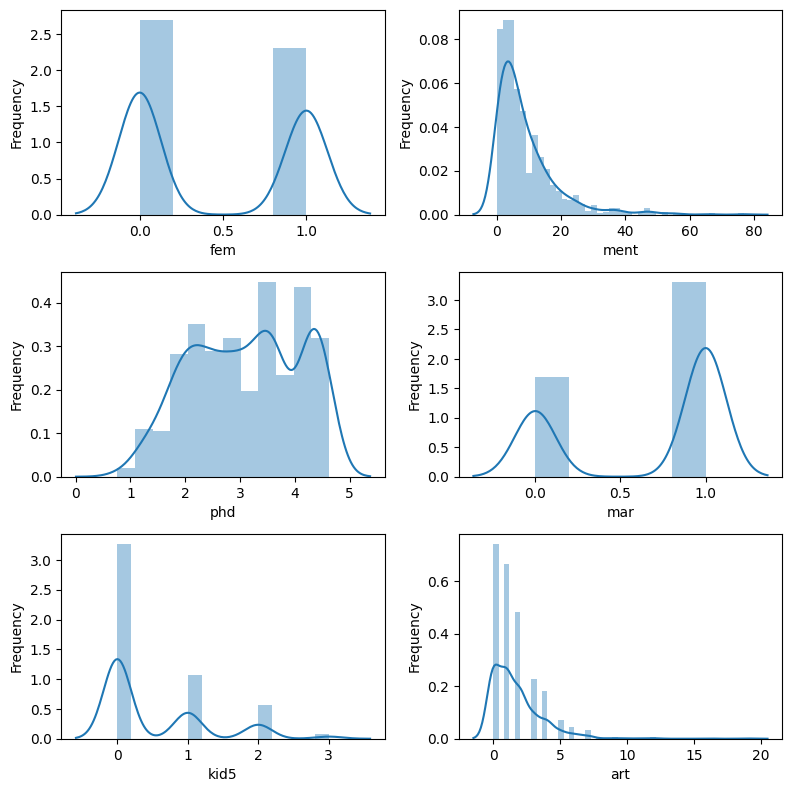

In [229]:
# figure size
plt.figure(figsize = (8, 8))
for idx, row in enumerate(nameColumns):
    
    plt.subplot(int(len(nameColumns)/2), 2, idx + 1)
    sns.distplot(df_Long[nameColumns[idx]])
    plt.xlabel(nameColumns[idx], fontsize = 10)
    plt.ylabel("Frequency", fontsize = 10)

# using padding
plt.tight_layout(pad=1.0)
  
plt.show()

#### __The distributions appear to be skewed, suggesting that utilizing linear least-squares regression to model these data might not be promising. Skewed distributions imply that the connection between the response and predictor variables might not be linear, and the model's assumptions of normality and homoscedasticity may not be met.__

In [230]:
# Before transformation
X = df_Long.loc[:, "fem" : "kid5"]
y = df_Long.loc[:, "art"]

# Fit linear regression model
model_before_transf = sm.OLS(y, sm.add_constant(X)).fit()

print(model_before_transf.summary())

                            OLS Regression Results                            
Dep. Variable:                    art   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     22.55
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           2.28e-21
Time:                        20:41:42   Log-Likelihood:                -1844.1
No. Observations:                 915   AIC:                             3700.
Df Residuals:                     909   BIC:                             3729.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3343      0.241      5.538      0.0

#### __Transformation__

The Box-Cox transformation is applied to the "ment" and "phd" data to achieve a more bell-shaped distribution.

In [231]:
transf = ["ment", "phd"]

for i in transf :
    df_Long[i].replace(0, 1e-10, inplace = True)
    df_Long[i] = stats.boxcox(df_Long[i])[0]

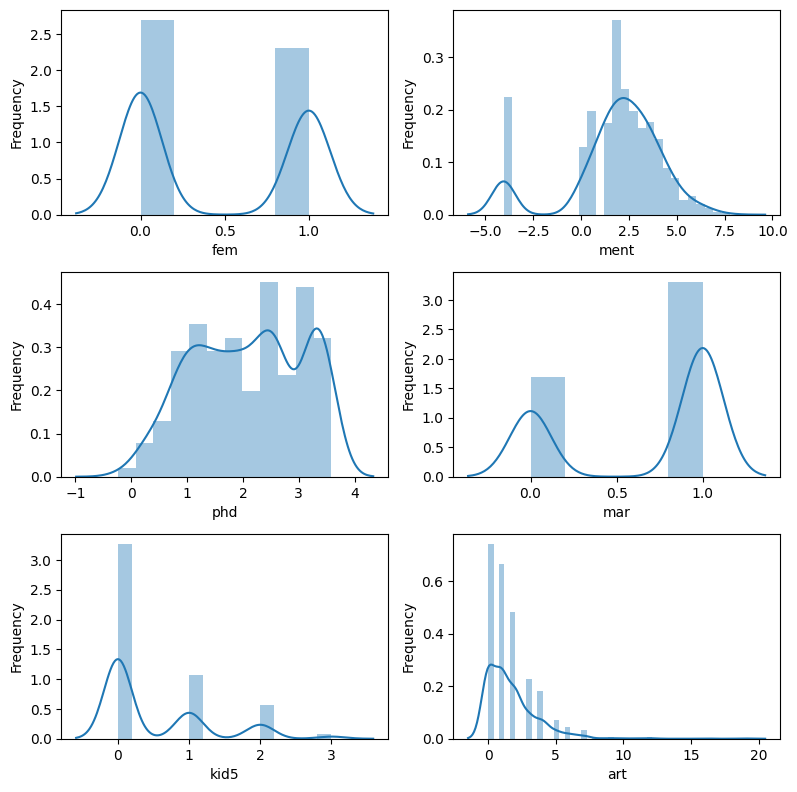

In [232]:
# figure size
plt.figure(figsize = (8, 8))
for idx, row in enumerate(nameColumns):
    
    plt.subplot(int(len(nameColumns)/2), 2, idx + 1)
    sns.distplot(df_Long[nameColumns[idx]])
    plt.xlabel(nameColumns[idx], fontsize = 10)
    plt.ylabel("Frequency", fontsize = 10)

# using padding
plt.tight_layout(pad=1.0)
  
plt.show()

In [233]:
# After transformation
X = df_Long.loc[:, "fem" : "kid5"]
y = df_Long.loc[:, "art"]

# Fit linear regression model
model_after_transf = sm.OLS(y, sm.add_constant(X)).fit()

print(model_after_transf.summary())

                            OLS Regression Results                            
Dep. Variable:                    art   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     18.19
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           3.13e-17
Time:                        20:41:43   Log-Likelihood:                -1854.0
No. Observations:                 915   AIC:                             3720.
Df Residuals:                     909   BIC:                             3749.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4657      0.195      7.517      0.0

#### __The R-squared value diminished subsequent to the Box-Cox transformation.__

### __(b) Following Long, perform a Poisson regression of art on the explanatory variables. What do you conclude from the results of this regression?__

In [234]:
# Fit the Poisson regression model
model_poisson = sm.Poisson(endog = df_Long['art'], exog = df_Long[["fem", "mar", "kid5", "phd", "ment"]]).fit()

# Print the model summary
print(model_poisson.summary())

Optimization terminated successfully.
         Current function value: 1.801483
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:                    art   No. Observations:                  915
Model:                        Poisson   Df Residuals:                      910
Method:                           MLE   Df Model:                            4
Date:                Thu, 06 Apr 2023   Pseudo R-squ.:                 0.05407
Time:                        20:50:20   Log-Likelihood:                -1648.4
converged:                       True   LL-Null:                       -1742.6
Covariance Type:            nonrobust   LLR p-value:                 1.151e-39
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
fem           -0.1718      0.050     -3.420      0.001      -0.270      -0.073
mar            0.2687      0.

#### __Based on the p-values, all attributes are significant except for "phd". Thus, the Poisson regression model demonstrates an effective fit to the data and reveals multiple significant determinants of research productivity.__

# References

- Generalized Linear Models : https://www.statsmodels.org/stable/glm.html

- Visualizing distributions of data : https://seaborn.pydata.org/tutorial/distributions.html

- Improving your data transformations: Applying Box-Cox transformations as a best practice : Jason W. Osborne, North Carolina State University : https://www.researchgate.net/publication/284261483_Improving_your_data_transformations_Applying_Box-Cox_transformations_as_a_best_practice